<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/BRIEFDescriptor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple d'utilisation de BRIEF

In [1]:
import numpy as np
import os
from skimage import data, io
from skimage.feature import BRIEF, corner_peaks, corner_fast, match_descriptors, plot_matches
import matplotlib.pyplot as plt

Obtention d'une image de skimage. Affichage.

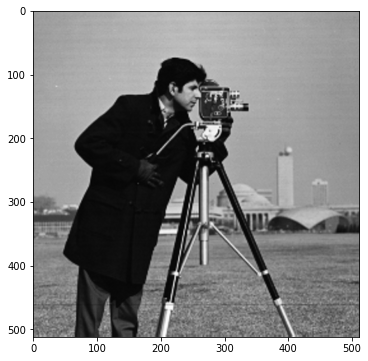

In [2]:
image = data.camera() 
plt.figure(figsize=(6,6)) 
plt.imshow(image, cmap='gray')
plt.show()

Extraction de coins avec l'algorithme FAST et affichage.

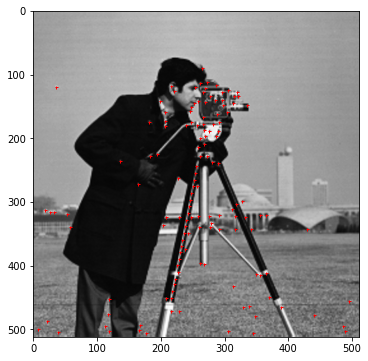

In [3]:
pointsClefs = corner_peaks(corner_fast(image), min_distance=5)
plt.figure(figsize=(6,6)) 
plt.imshow(image, cmap='gray')
plt.plot(pointsClefs[:, 1], pointsClefs[:, 0], '+r', markersize=3)
#ax.axis((0, 350, 350, 0))
plt.show()

On note que FAST donne moins de points clefs que SIFT. Voir aussi avec exemple suivant dans ce fichier. On décrit les points avec BRIEF.

In [4]:
extractor = BRIEF(descriptor_size=128, patch_size=49, mode='normal')
extractor.extract(image, pointsClefs)

Affichage du résultat pour un descripteur donné $i$. 

In [5]:
i = 10 #Pour l'affichage du i-ième descripteur
print(pointsClefs[i])
print(extractor.descriptors[i])

[127 266]
[ True False False False  True False  True  True False False  True False
 False False  True False  True False  True  True False False False False
  True False  True  True False  True  True  True  True  True False  True
 False False False False False False  True False False  True  True  True
  True False  True False  True False  True  True False False False False
 False False False False  True  True  True False False False  True False
 False False False False False  True  True False False False  True  True
 False False False  True  True  True False  True False False False  True
 False  True  True  True False  True  True  True False  True  True False
  True False False False False False  True  True False  True False False
 False False False  True  True  True  True  True]


Exemple de mise en correspondance de points FAST/BRIEF dans une paire d'images.

In [6]:
image_name = 'in000235.jpg'
if not os.path.exists(image_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000235.jpg
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000240.jpg

Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000235.jpg
To: /content/in000235.jpg
100% 177k/177k [00:00<00:00, 2.81MB/s]
Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000240.jpg
To: /content/in000240.jpg
100% 177k/177k [00:00<00:00, 2.73MB/s]


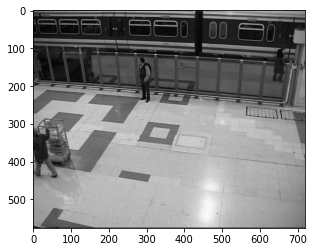

In [7]:
image1 = io.imread('in000235.jpg', as_gray= True)
image2 = io.imread('in000240.jpg', as_gray= True)
plt.imshow(image2, cmap='gray')
plt.show()

Extraction des points FAST et descripteurs BRIEF. Et mise en correspondance.

In [8]:
pointsClefs1 = corner_peaks(corner_fast(image1), min_distance=5)
pointsClefs2 = corner_peaks(corner_fast(image2), min_distance=5)
extractor.extract(image1, pointsClefs1)
descripteurs1 = extractor.descriptors
extractor.extract(image2, pointsClefs2)
descripteurs2 = extractor.descriptors
matches = match_descriptors(descripteurs1, descripteurs2, cross_check=True)

Affichage du résultat. 

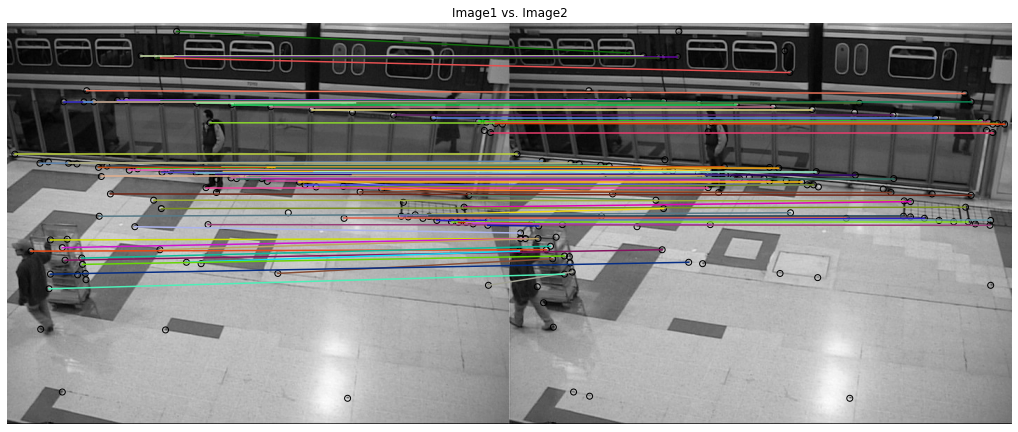

In [9]:
fig = plt.figure(figsize=(18, 10)) 
ax0 = plt.subplot()
plot_matches(ax0,image1, image2, pointsClefs1, pointsClefs2, matches)
ax0.axis('off')
ax0.set_title("Image1 vs. Image2")
plt.show()